## Documentation

http://seaborn.pydata.org/
- Statisitcal plotting library, designed to work very well with Pandas dataframe

In [1]:
import seaborn as sns
%matplotlib inline

## Distribution Plots

1. distplot
2. jointplot
3. pairplot
4. rugplot
5. kdeplot

In [2]:
# Built-in dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distplot
- Distribution of a univariate set of obsrvations

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

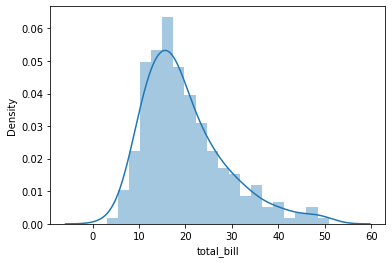

In [6]:
sns.distplot(tips['total_bill'], bins = 20)
# Safe to ignore warnings
# Bins control the number of bars
# To remove KDE , KDE = False

### Jointplot

Match up two distplots for bivariate data. With choice of what **kind** parameter to compare with: 
* “scatter” (Default)
* “reg” 
* “resid” 
* “kde” 
* “hex”

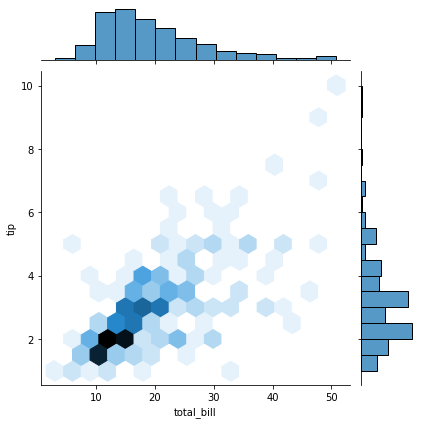

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

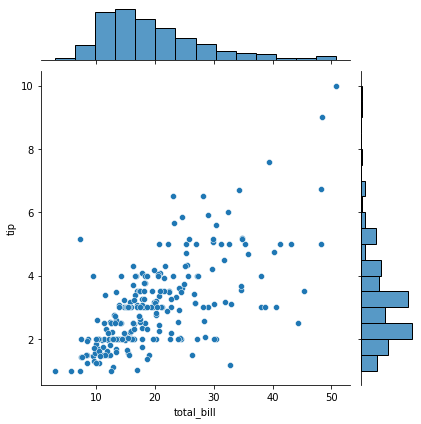

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips)

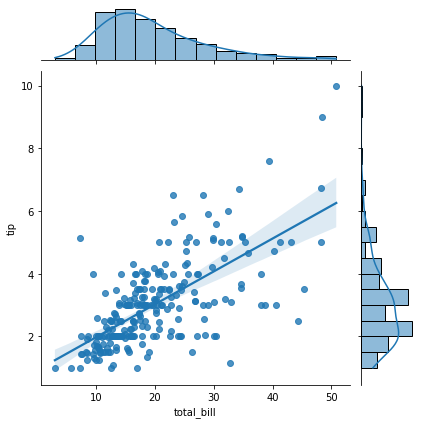

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### Pairplot

- pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 
- Suitable for quick data visualization

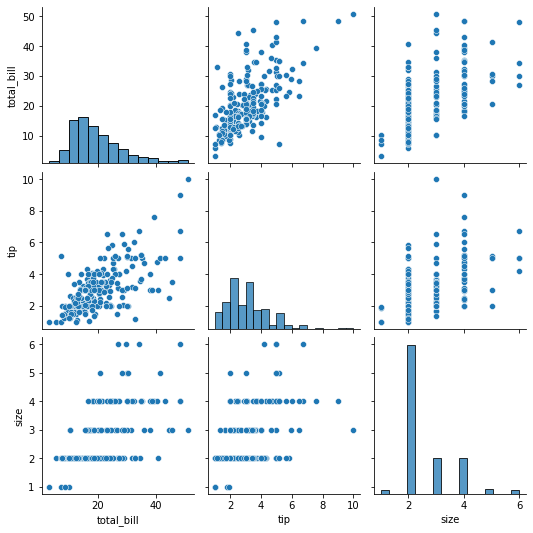

In [16]:
sns.pairplot(tips)

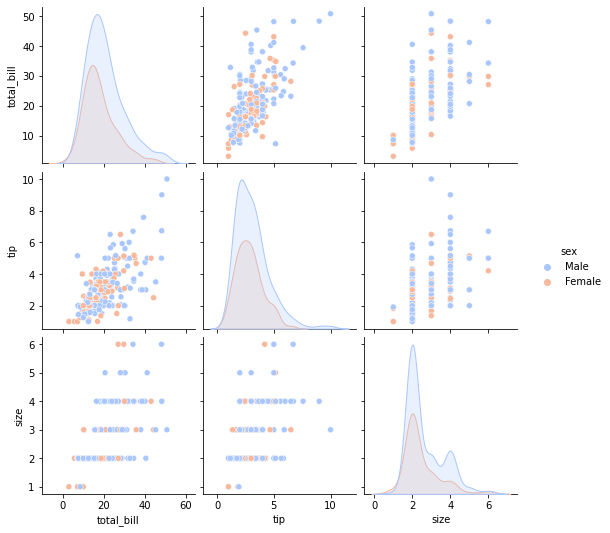

In [17]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

### Rugplot

- they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

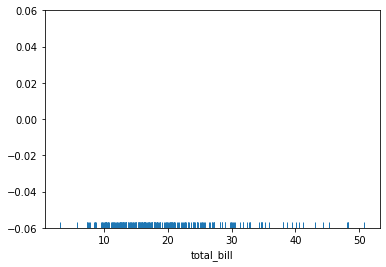

In [18]:
sns.rugplot(tips['total_bill'])

### KDEplot

- deplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

(0.0, 1.0)

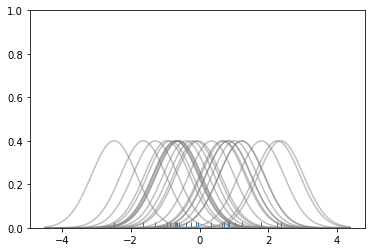

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)
sns.rugplot(dataset);

x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

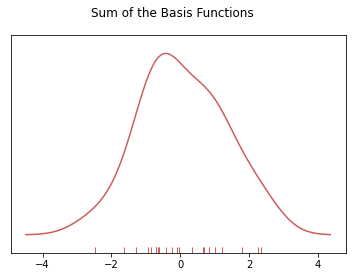

In [20]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")